# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [4]:
# Print out the list of cities
cities

['salalah',
 'clyde river',
 'san patricio',
 'castro',
 'port hedland',
 'punta arenas',
 'mataura',
 'hermanus',
 'burnie',
 'missoula',
 'hovd',
 'rikitea',
 'dzilam gonzalez',
 'ushuaia',
 'illoqqortoormiut',
 'saskylakh',
 'jamestown',
 'albany',
 'bud',
 'anadyr',
 'nizhnyaya tavda',
 'alausi',
 'vaini',
 'nanortalik',
 'moose factory',
 'santa isabel do rio negro',
 'yellowknife',
 'ribeira grande',
 'taolanaro',
 'pailon',
 'kapaa',
 'ayia galini',
 'honningsvag',
 'busselton',
 'alexandria',
 'laguna',
 'iqaluit',
 'chifeng',
 'katsuura',
 'goundi',
 'orange cove',
 'grand river south east',
 'sola',
 'carnarvon',
 'gigmoto',
 'butaritari',
 'hithadhoo',
 'havoysund',
 'port elizabeth',
 'avarua',
 'binzhou',
 'passau',
 'namibe',
 'lompoc',
 'saint george',
 'olinda',
 'halifax',
 'matara',
 'seljord',
 'bahia de caraquez',
 'hobart',
 'nikolskoye',
 'arraial do cabo',
 'axim',
 'airai',
 'police',
 'sarahan',
 'hilo',
 'georgetown',
 'sahuaripa',
 'didi lilo',
 'yenagoa',
 '

In [5]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL 
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city).json

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Set up lists to hold response info
city_name = []
lat = []
lng = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each 
for city in cities:
        try:
            response = requests.get(query_url + city).json()
            city_name.append(response['name'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            temp_max.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            print(f"Processing Record {city}")
        except KeyError:
            print("City not found")
            pass

Processing Record salalah
Processing Record clyde river
Processing Record san patricio
Processing Record castro
Processing Record port hedland
Processing Record punta arenas
Processing Record mataura
Processing Record hermanus
Processing Record burnie
Processing Record missoula
Processing Record hovd
Processing Record rikitea
Processing Record dzilam gonzalez
Processing Record ushuaia
City not found
Processing Record saskylakh
Processing Record jamestown
Processing Record albany
Processing Record bud
Processing Record anadyr
Processing Record nizhnyaya tavda
Processing Record alausi
Processing Record vaini
Processing Record nanortalik
Processing Record moose factory
Processing Record santa isabel do rio negro
Processing Record yellowknife
Processing Record ribeira grande
City not found
Processing Record pailon
Processing Record kapaa
Processing Record ayia galini
Processing Record honningsvag
Processing Record busselton
Processing Record alexandria
Processing Record laguna
Processing R

Processing Record villazon
Processing Record nizhneangarsk
Processing Record puerto narino
Processing Record atbasar
City not found
Processing Record sambava
Processing Record saint-alexandre
Processing Record tessalit
Processing Record nicoya
Processing Record leningradskiy
Processing Record magdagachi
Processing Record bubaque
Processing Record kizilskoye
Processing Record miandoab
Processing Record damghan
Processing Record hof
Processing Record albury
Processing Record khatanga
Processing Record teluk nibung
Processing Record doha
City not found
Processing Record kirkkonummi
Processing Record pimentel
Processing Record carinhanha
Processing Record tungor
Processing Record filadelfia
City not found
Processing Record sulangan
Processing Record moyale
City not found
Processing Record abancay
Processing Record pochutla
Processing Record sakakah
Processing Record granadilla de abona
Processing Record lahaina
Processing Record mangai
Processing Record gao
Processing Record jacareacanga
P

In [7]:
# Create a Data Frame from above results
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Salalah,17.0151,54.0924,69.8,78,0,4.61,OM,1612210153
1,Clyde River,70.4692,-68.5914,-14.8,70,1,12.66,CA,1612210153
2,San Patricio,28.0170,-97.5169,69.8,19,20,9.22,US,1612210153
3,Castro,-24.7911,-50.0119,73.4,86,99,6.46,BR,1612210153
4,Port Hedland,-20.3167,118.5667,78.8,94,90,21.85,AU,1612210153


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [60]:
# Export the city data into a .csv
weather_data.to_csv("../Resources/weather_data.csv", encoding="utf-8", index=False)

In [61]:
# Display the Data Frame
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bathsheba,13.2167,-59.5167,78.80,73,40,21.85,BB,1612061852
1,Avarua,-21.2078,-159.7750,84.20,70,75,4.61,CK,1612061852
2,Jamestown,42.0970,-79.2353,18.00,79,1,5.75,US,1612061821
3,Richards Bay,-28.7830,32.0377,74.25,94,85,4.36,ZA,1612061646
4,Rikitea,-23.1203,-134.9692,79.38,72,0,11.52,PF,1612061852
...,...,...,...,...,...,...,...,...,...
552,Barra de Tecoanapa,16.5167,-98.7500,76.19,81,62,3.89,MX,1612061914
553,Panguna,-6.3164,155.4848,80.85,67,99,6.71,PG,1612061914
554,Ulladulla,-35.3500,150.4667,69.01,94,90,8.05,AU,1612061914
555,Cap-aux-Meules,47.3821,-61.8597,26.60,80,100,18.41,CA,1612061914


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [55]:
weather_data["Humidity"].max()

100

None of the cities have humidity over 100%

In [ ]:
#  Get the indices of cities that have humidity over 100%.

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

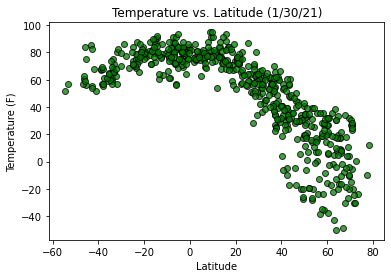

In [8]:
# Temperature (F) vs. Latitude Scatterplot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("Temperature vs. Latitude (1/30/21)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("../Images/TempvsLat.png")
plt.show()

Temperature (F) vs. Latitude Scatterplot Analysis
This scatterplot shows the relationship between maximum temperature at its corresponding latitude. Countries closer to the equator (latitude = 0), have higher and warmer temperatures. Countries further away from the equator are considerably colder. 

## Latitude vs. Humidity Plot

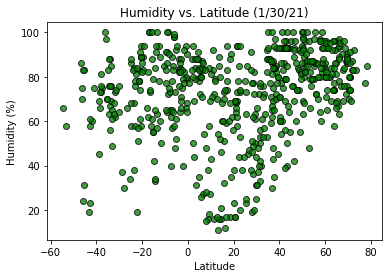

In [9]:
# Humidity (%) vs. Latitude Scatterplot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("Humidity vs. Latitude (1/30/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/HumvsLat.png")
plt.show()

Humidity (%) vs. Latitude Scatterplot Analysis
This scatterplot shows the relationship between percent humidity and latitude. From this scatterplot, there seems to be generally no correlation between humidity and latitude. However, at a high latitude, there seems to be greater amounts of high humidity.

## Latitude vs. Cloudiness Plot

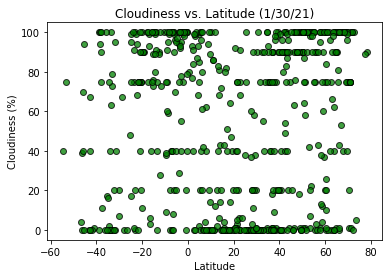

In [10]:
# Cloudiness (%) vs. Latitude Scatterplot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("Cloudiness vs. Latitude (1/30/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/CloudvsLat.png")
plt.show()

Cloudiness (%) vs. Latitude Scatterplot Analysis
This scatterplot shows the relationship between percent cloudiness and latitude. From this scatterplot, there does not seem to be a correlation between these two variables. Cloudiness across latitudes looks to be evenly distributed across the board, with 0% and 100% cloudiness having the most countries.

## Latitude vs. Wind Speed Plot

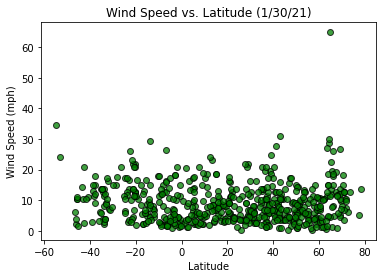

In [11]:
    # Wind Speed (mph) vs. Latitude Scatterplot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("Wind Speed vs. Latitude (1/30/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/WindvsLat.png")
plt.show()

Wind Speed (mph) vs. Latitude Scatterplot Analysis
This scatterplot shows the relationship between wind speed and latitude. From this scatterplot, we can see that a large majority of countries have wind speeds below 20 mph, with a few outliers having wind speeds higher than that. Apart from this, there seems to be no correlation between wind speed and latitude.

## Linear Regression

In [12]:
# Create Data Frame of Northern Hemisphere
northern_hem = weather_data[weather_data['Lat'] >= 0]
northern_hem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Salalah,17.0151,54.0924,69.80,78,0,4.61,OM,1612210153
1,Clyde River,70.4692,-68.5914,-14.80,70,1,12.66,CA,1612210153
2,San Patricio,28.0170,-97.5169,69.80,19,20,9.22,US,1612210153
9,Missoula,47.0166,-113.8009,44.01,60,90,4.61,US,1612210153
10,Khovd,48.0056,91.6419,5.25,84,100,1.59,MN,1612210154
...,...,...,...,...,...,...,...,...,...
569,Turukhansk,65.8167,87.9833,-10.34,88,100,7.78,RU,1612209684
570,Kalmunai,7.4167,81.8167,77.20,83,4,5.70,LK,1612210222
571,Diveyevo,55.0433,43.2418,14.70,97,100,5.37,RU,1612210222
572,Korla,41.7597,86.1469,23.14,83,80,3.62,CN,1612209730


In [13]:
# Create Data Frame of Southern Hemisphere
southern_hem = weather_data[weather_data['Lat'] <=0]
southern_hem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Castro,-24.7911,-50.0119,73.40,86,99,6.46,BR,1612210153
4,Port Hedland,-20.3167,118.5667,78.80,94,90,21.85,AU,1612210153
5,Punta Arenas,-53.1500,-70.9167,57.20,58,75,24.16,CL,1612210153
6,Mataura,-46.1927,168.8643,60.48,75,39,2.28,NZ,1612210153
7,Hermanus,-34.4187,19.2345,63.00,76,0,4.00,ZA,1612210153
...,...,...,...,...,...,...,...,...,...
551,Lakes Entrance,-37.8811,147.9810,57.00,81,100,12.10,AU,1612210220
559,Mayumba,-3.4320,10.6554,80.60,82,93,5.53,GA,1612210221
566,Mendi,-6.1761,143.6513,56.01,99,90,1.68,PG,1612210222
567,Barra do Garças,-15.8900,-52.2567,84.20,61,75,6.91,BR,1612209604


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7211215201915661


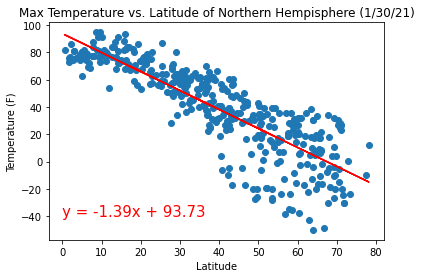

In [14]:
# Perform Linear Regression and plot r-squared
x_values = northern_hem['Lat']
y_values = northern_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.title("Max Temperature vs. Latitude of Northern Hempisphere (1/30/21)")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/NHTempvsLat.png")
plt.show()

Northern Hemisphere - Max Temp vs. Latitude Linear Regression
For this regression, there seems to be a negative correlation. At higher latitudes, the max temperatures are low, whereas at lower latitudes, the max temperatures are high. Even still, this is not a perfect correlation because there still exists some outliers that have an effect on the r-squared value.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2868466900765103


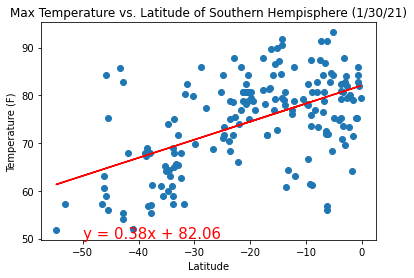

In [22]:
# Perform Linear Regression and plot r-squared
x_values = southern_hem['Lat']
y_values = southern_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.title("Max Temperature vs. Latitude of Southern Hempisphere (1/30/21)")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/SHTempvsLat.png")
plt.show()

Southern Hempisphere - Max Temp vs. Latitude Linear Regression
In this regression, there is no clear correlation between max temperature and latitude. There are a lot of outliers in this regression that do not exist near the trendline, which causes the r-squared value to be lower than we would like it to be.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17856112680423408


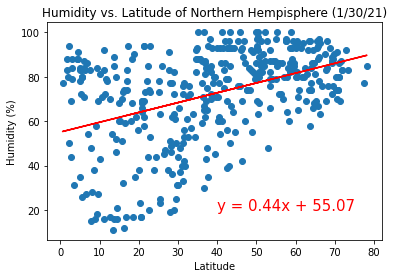

In [24]:
# Perform Linear Regression and plot r-squared
x_values = northern_hem['Lat']
y_values = northern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title("Humidity vs. Latitude of Northern Hempisphere (1/30/21)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/NHHumvsLat.png")
plt.show()

Northern Hempisphere - Humidity (%) vs. Latitude Linear Regression
There is a very little positive correlation in this linear regression. We can see that there are countries that fall along the trendline, but a large majority are either above or below this line. As a result, the r-squared value for this regression is low.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05983423847551668


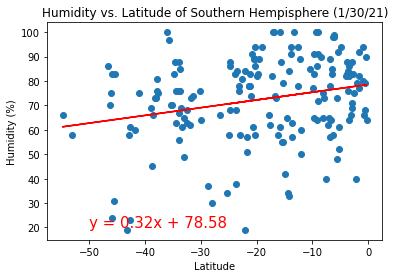

In [25]:
# Perform Linear Regression and plot r-squared
x_values = southern_hem['Lat']
y_values = southern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("Humidity vs. Latitude of Southern Hempisphere (1/30/21)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/SHHumvsLat.png")
plt.show()

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
For this linear regression, there seems to be a very little correlation between latitude and percent humidity of countries in the Southern Hemisphere. This is evident given the very low r-squared value.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06586008882713452


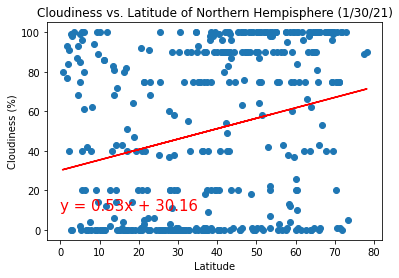

In [27]:
# Perform Linear Regression and plot r-squared
x_values = northern_hem['Lat']
y_values = northern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title("Cloudiness vs. Latitude of Northern Hempisphere (1/30/21)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/NHCloudvsLat.png")
plt.show()

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
Looking at this plot, we can see multiple horizontal lines. As a result, the trendline created from the linear regression tries to connect these different horizontal lines. Since it cannot, we are given a low r-squared value.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11982989939638579


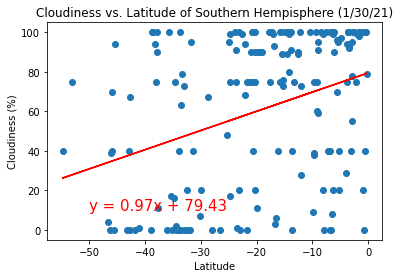

In [28]:
# Perform Linear Regression and plot r-squared
x_values = southern_hem['Lat']
y_values = southern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title("Cloudiness vs. Latitude of Southern Hempisphere (1/30/21)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/SHCloudvsLat.png")
plt.show()

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
Similar to the above scatterplot, there seems to be some sorts of horizontal lines that can be seen in the scatterplot. However, there seems to be a larger grouping of countries in the top right corner of the plot. Therefore, the r-squared value fot this plot is higher than the previous plot.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.009052423250977836


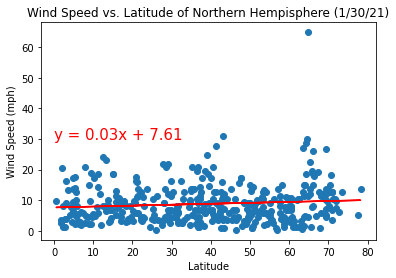

In [29]:
# Perform Linear Regression and plot r-squared
x_values = northern_hem['Lat']
y_values = northern_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.title("Wind Speed vs. Latitude of Northern Hempisphere (1/30/21)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/NHWindvsLat.png")
plt.show()

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
Looking at this scatterplot, we can see that the countries are not distributed evenly at all across the plot. All of the countries seem to be towards the bottom of the plot with one outlier at the very top of the plot. As a result, the r-squared value for this linear regression is very low.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05232545264699728


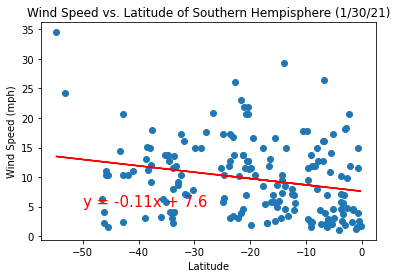

In [30]:
# Perform Linear Regression and plot r-squared
x_values = southern_hem['Lat']
y_values = southern_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,5),fontsize=15,color="red")
plt.title("Wind Speed vs. Latitude of Southern Hempisphere (1/30/21)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/SHWindvsLat.png")
plt.show()

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
From this linear regression, there seems to be a negative correlation between latitude and wind speed in the souther hemisphere. Looking at the scatterplot we can see that a large majority of countries around the equator (latitude = 0) have very low wind speeds.